In [56]:
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import make_blobs, make_classification, make_circles, make_moons
from matplotlib import pyplot as plt
import os
from IPython.display import Image, display
seed = 42

In [36]:
if not os.path.exists('pix'):
    os.makedirs('pix')

In [7]:
n_samples = 1000
centers  = 5
cluster_std = 1.4
random_state = seed

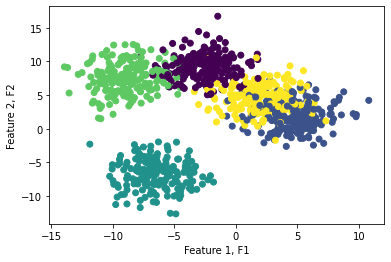

In [18]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state = random_state, cluster_std=cluster_std)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_blobs_2d.png',bbox_inches='tight', format='png')
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_pickle('datasets/make_blobs_2d.pickle')

In [13]:
n_samples = 1000
centers  = 5
cluster_std = 2

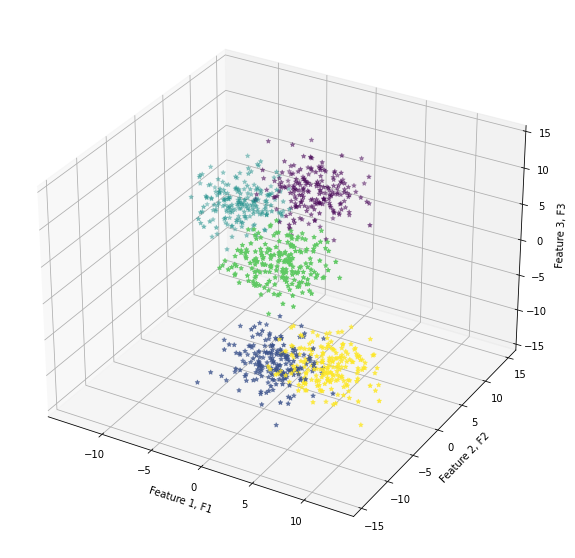

In [14]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=3,
                  random_state=random_state, cluster_std=cluster_std)
df = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
plt.savefig('pix/make_blobs_3d.png',bbox_inches='tight', format='png')
df.to_pickle('datasets/make_blobs_3d.pickle')